# EDA to Predicton(DieTanic)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore') #주로 버전 차이에서 오는 경고 무시하기 위함
%matplotlib inline

sns.set(font_scale=2)

In [2]:
data = pd.read_csv('../input/titanic/train.csv')

In [3]:
data.isnull().sum(axis=0) #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The Age,Cabin and Embarked have null values. I will try to fix them.

# 1. How many Survived?

Text(0.5, 1.0, 'Survived')

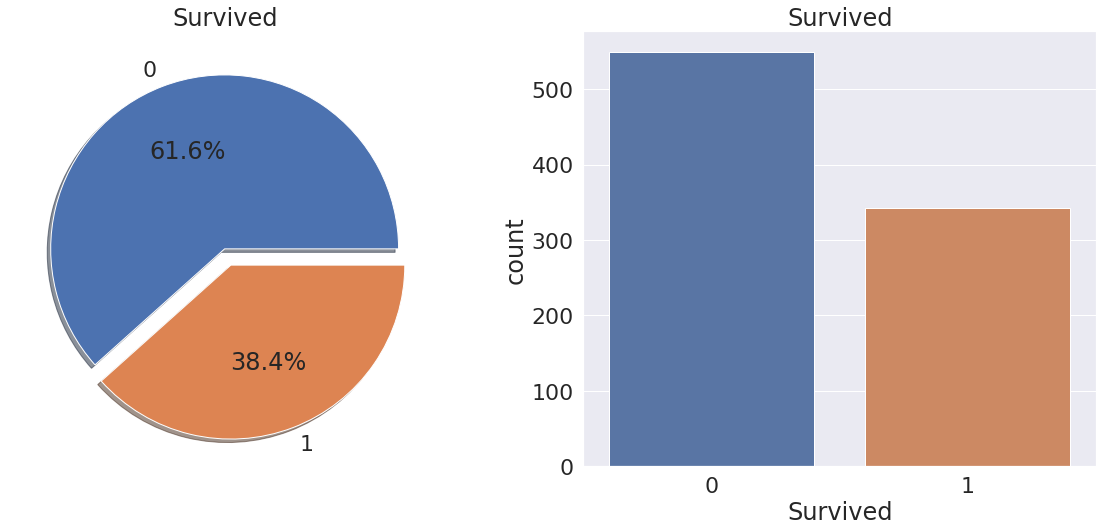

In [14]:
f,ax =plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data, ax=ax[1])
ax[1].set_title('Survived')

- it is evident that not many passengers survived the accident.

- Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

- We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

- First let us understand the different types of features.

# 2. Type Of Features

### Categorical Features:
- A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. 
- For example, gender is a categorical variable having two categories (male and female).
- Now we cannot sort or give any ordering to such variables.They are also known as Nominal Variables.
- Categorical Features in the dataset: Sex, Embarked


### Ordinal Features:
- An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. 
- For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.
- Ordinal Features in the dataset : PClass

### Continuous Feature:
- A feature is said to be continuous if it can take values between any two points or between the minimum or maximum values in the features column.
- Continuous Features in the dataset: Age

## 3. Analysing The Features

#### 3-1. Sex -> Categorical Feature

In [15]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sex:Survived vs Dead')

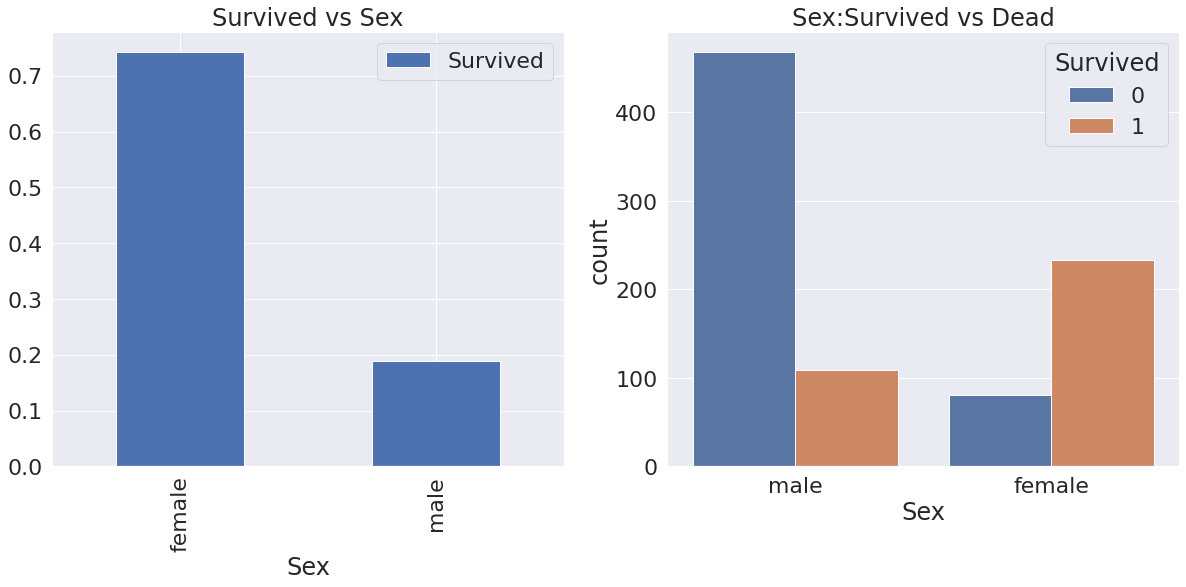

In [16]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

- This looks interesting. The number of men on the ship is lot more than the number of women, Still the number of women saved is almost twice the number of males saved. 
- The survival rates for a women on the ship is around 75% while that for men in around 18~19%.

- This looks to be a very important feature for modeling.But is it the best?? Lets check other features.

#### 3-2. Pclass -> Ordinal Feature

In [17]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass: Survived vs Dead')

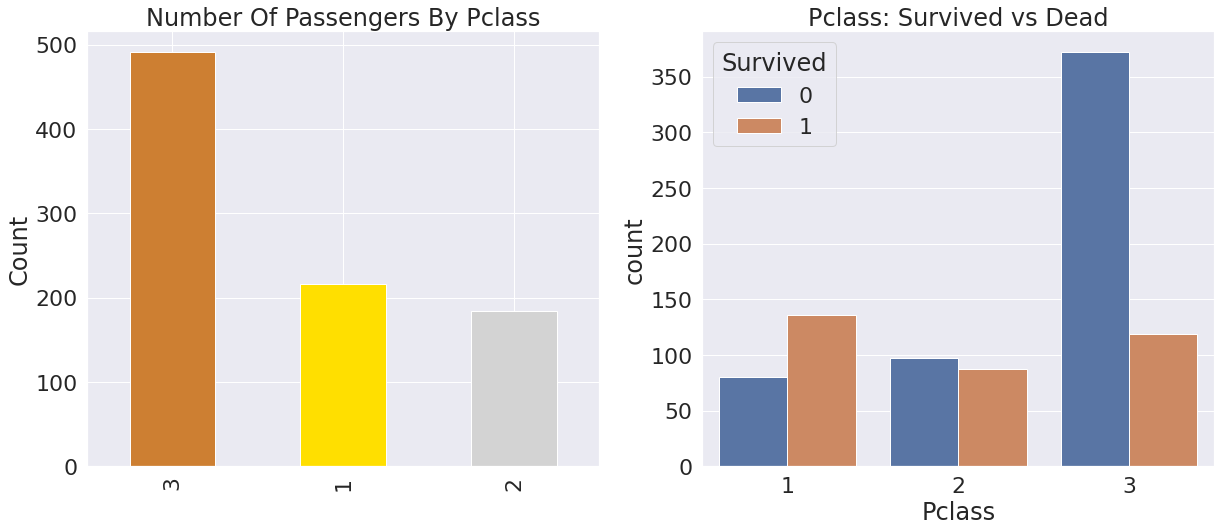

In [18]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

- People say Money Can't But Everything. But we can clearly see that Passengers Of Pclass1 were given a very high priority while rescue.
- Even though the number of Passengers in Pclass 3 were a lot higer,still the number of survival from tehm is very low, somewhere around 25%

- For Pclass1 %survied is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

- Let Dive in little bit more and check for other interesting observations.Lets check survival rate with Sex and Pclass Together.

In [19]:
pd.crosstab([data['Sex'],data['Survived']],data['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

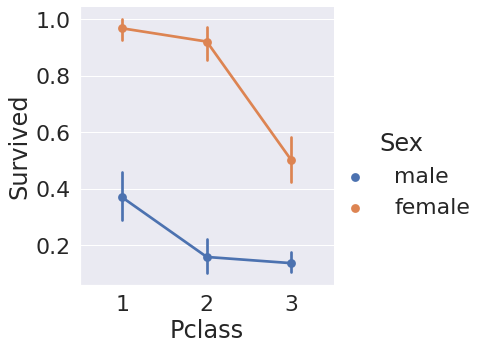

In [20]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data) #막대가 표준편차 표현, 작을 수록 신뢰

- We use FactorPlot in this case, because they make the seperation of categorical values easy.
- Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.

- It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.
Looks like Pclass is also an important feature. Lets analyse other features.

#### 3-3. Age -> Continuous Feature

In [21]:
print('Oldest Passenger was of:', data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship', data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship 29.69911764705882 Years


In [22]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0, 0.5, 'count')

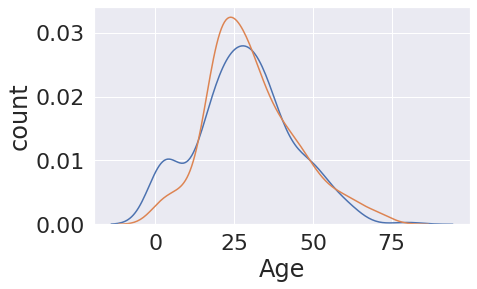

In [23]:
sns.kdeplot(data.loc[data['Survived']==1,'Age'],label= 'Survived')
sns.kdeplot(data.loc[data['Survived']==0,'Age'],label= 'Died')
plt.xlabel('Age')
plt.ylabel('count')

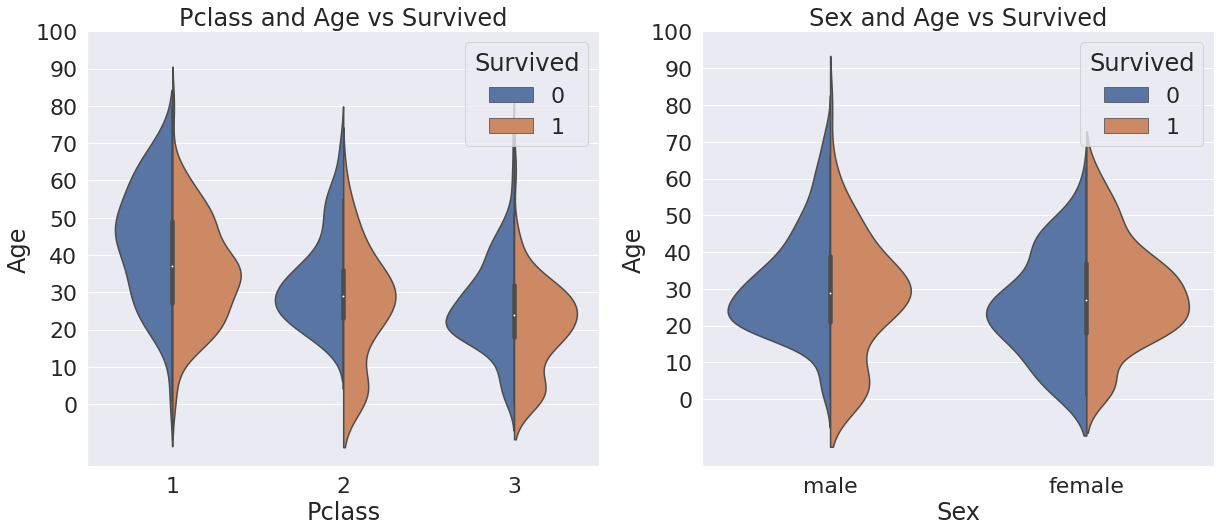

In [24]:
f,ax =plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

Observations:
- 1) The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.

- 2) Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.

- 3) For males, the survival chances decreases with an increase in age.

- As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.


- But the problem is, there were many people with many different ages. 


- We just can't assign a 4 year kid with the mean age that is 29 years. 
- Is there any way to find out what age-band does the passenger lie??


- Bingo!!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. 
- Thus we can assign the mean values of Mr and Mrs to the respective groups.


- "What's in A Name??" ---> Feature:p

In [25]:
data['Initial']=0
for i in data:
    data['Initial'] =data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

- Okay so here we are using the Regex:[A-Za-z]+)..So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the initials from the Name.

In [26]:
pd.crosstab(data['Initial'],data['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- Okay so there are some misspelled initials like Mile or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [27]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [28]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

- Filling NaN Ages

In [29]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5


In [30]:
data["Age"].isnull().any() #So no null values left finally

False

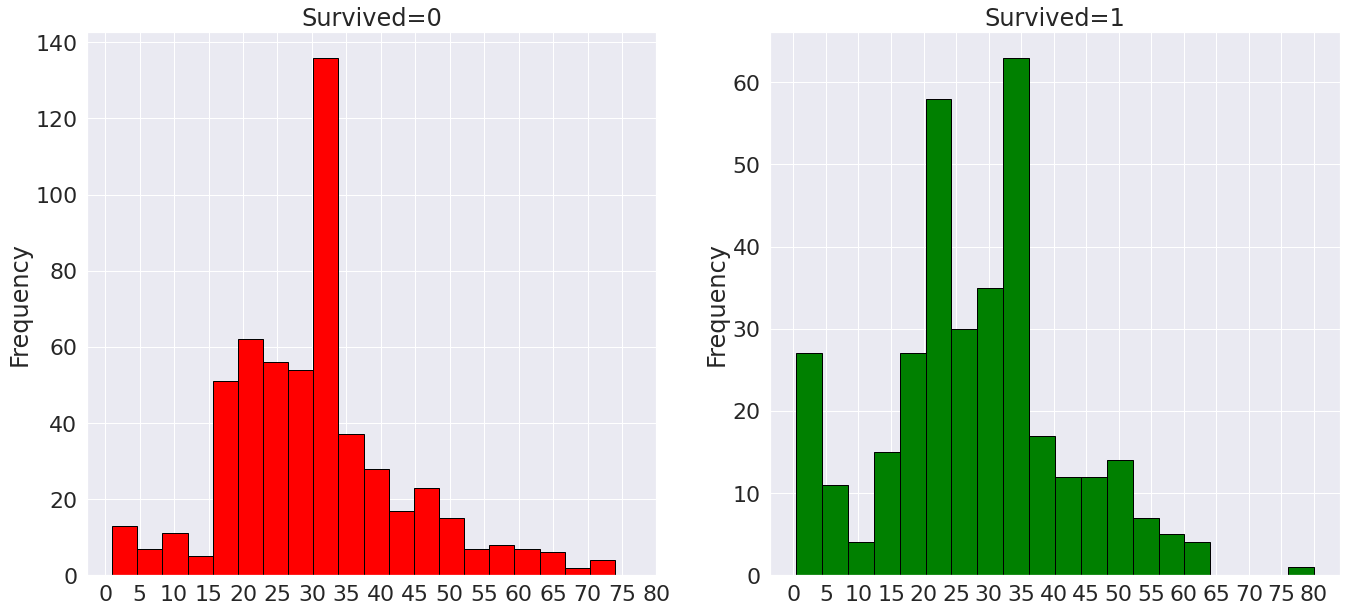

In [31]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

- Observations:
- 1) The Toddlers(age<5) were saved in large numbers(the Women and Child First Policy).
- 2) The Oldest Passenger was saved(80 years)
- 3) Maximum number of deaths were in the age group of 30-40.

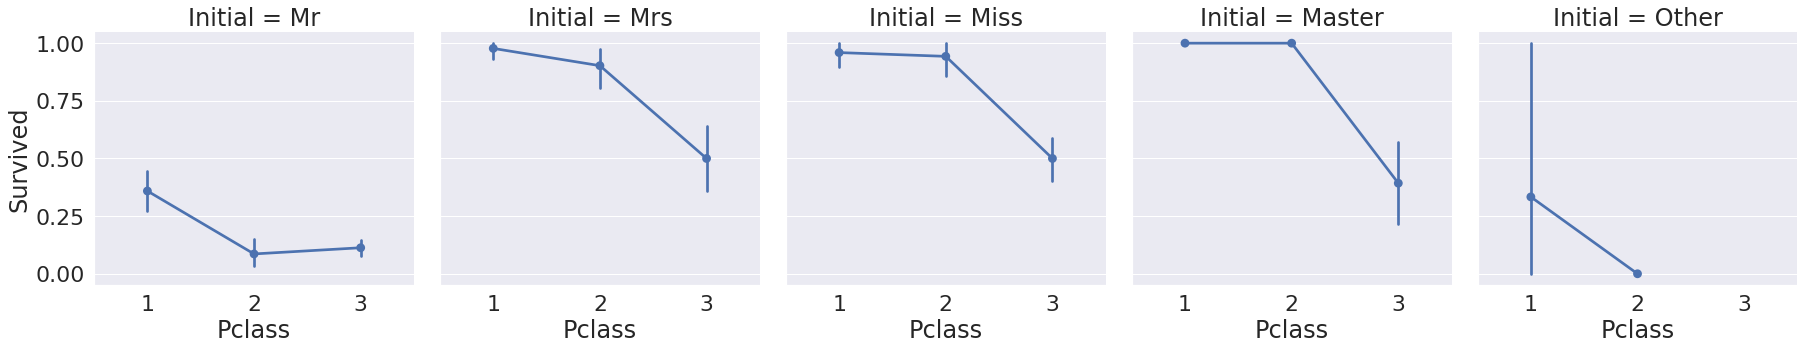

In [32]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)

- The Women and Child first policy thus holds true irrespective of the class.

#### 3-4. Embarked -> Categorical Value

In [37]:
pd.crosstab([data['Embarked'],data['Pclass']],[data['Sex'],data['Survived']],margins=True).style.background_gradient(cmap='summer_r')

- Chances for Survivial bu Port Of Embarkation

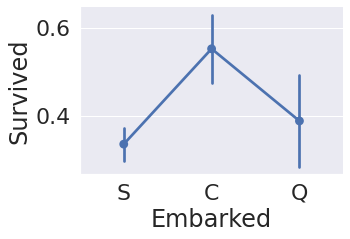

In [38]:
sns.factorplot('Embarked','Survived',data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)

- The chances for survival for Port C is highest around 0.55 while it is lowest for S.

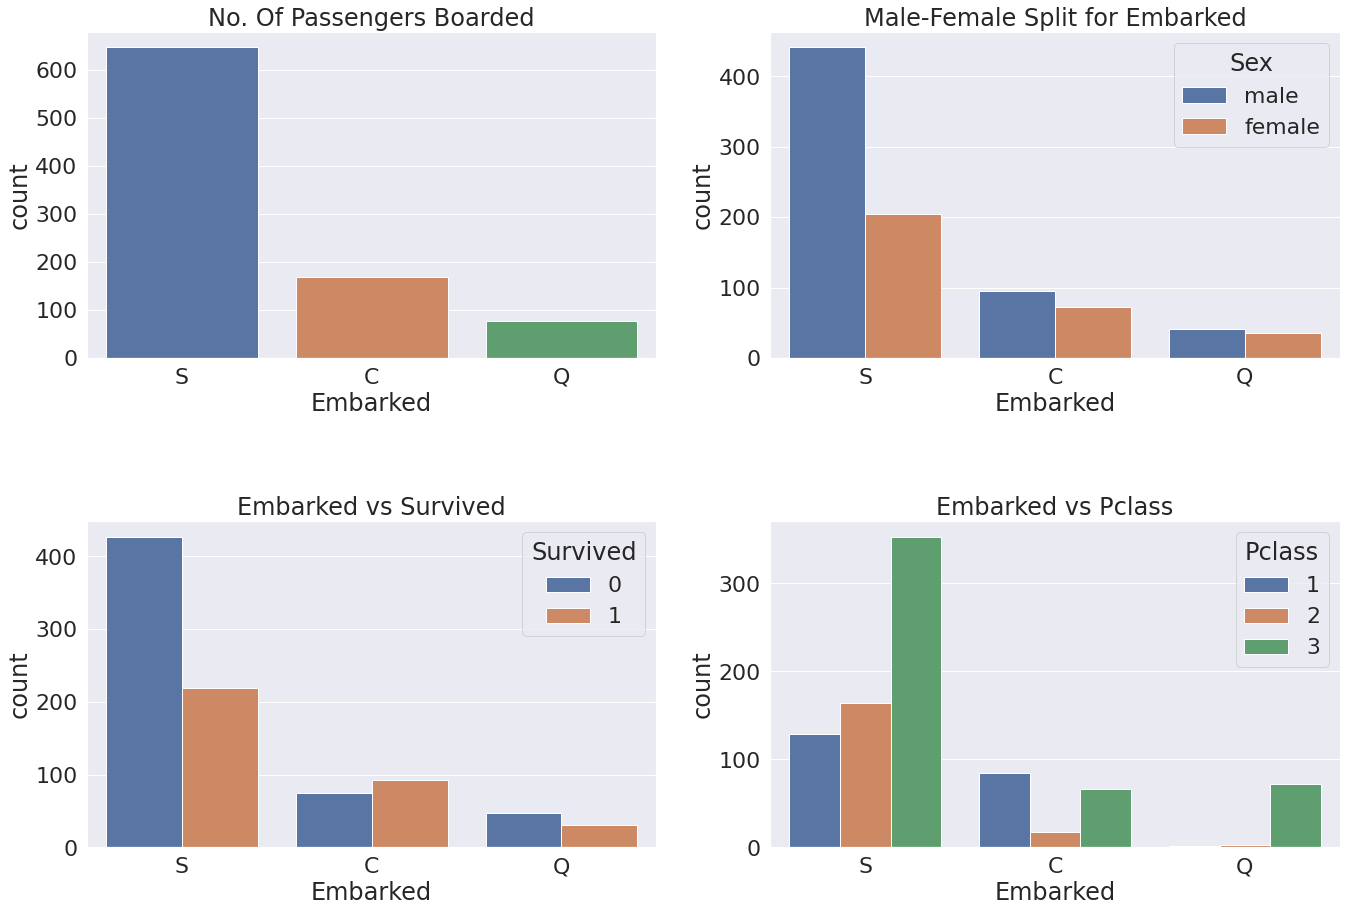

In [76]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=.2,hspace=0.5)
plt.show()

- Observations:

- 1) Maximum passengers boarded from S.Majority of them being from Pclass3.
- 2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.
- 3) The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.
- 4) Port Q had almost 95% of the passengers were from Pclass3.

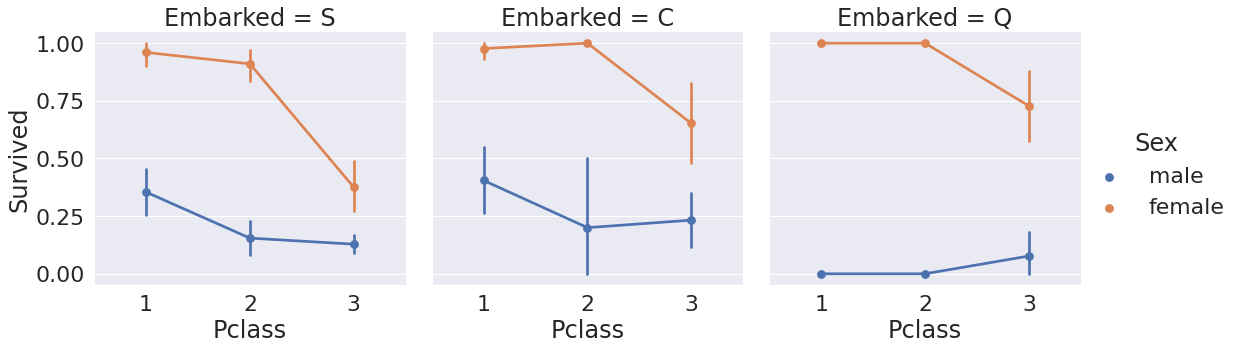

In [74]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)

<h5>Observations:</h5>
- 1) The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass (embarked 아닐까)
- 2) Post S looks to be very unlucky for Pclass3 Passengers as the survival rate for both men and women is very low.(Money Matters)
- 3) Port Q looks to be unlukiest for Men, as almost all were from Pclass3.

<h5>Filling Embarked NaN</h5>
- As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [68]:
data['Embarked'].fillna('S',inplace=True)

In [69]:
data.Embarked.isnull().any()# Finally No NaN values

False

<h3>- SibSip -> Discrete Feature</h3>

- This feature represents whether a person is alone or with his family members.
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife

In [70]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


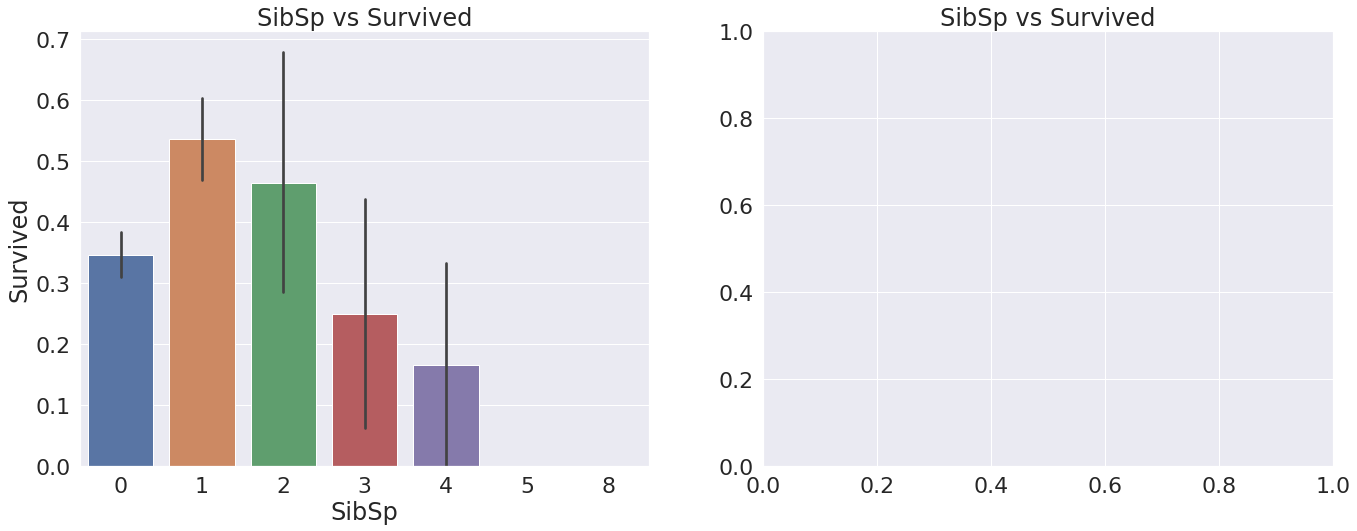

In [79]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1]) #error
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [78]:
pd.crosstab(data['SibSp'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7
